<a href="https://colab.research.google.com/github/asheta66/Data-Science/blob/main/Linear_and_Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

df = pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [76]:
df = df.rename(columns={'medv': 'TARGET', 'rm': 'RM', 'lstat':'LSTAT'})
df.head()

,crim,zn,indus,chas,nox,RM,age,dis,rad,tax,ptratio,b,LSTAT,TARGET
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [77]:
df1 = df[["LSTAT", "RM", "TARGET"]]

features = df1.drop('TARGET', axis=1)
target =df['TARGET']

<Figure size 1000x500 with 0 Axes>

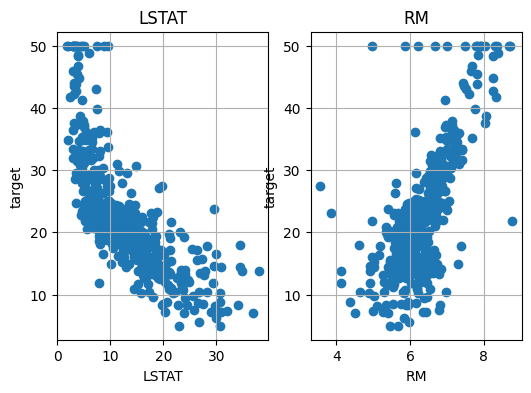

In [82]:
plt.figure(figsize=(10, 5))

features = df[['LSTAT', 'RM']]
target = df['TARGET']

# Set the figure size
plt.figure(figsize=(6, 4))

plt.subplot(1, 2, 1)
x = df1["LSTAT"]
y = target
plt.scatter(x, y, marker='o')
plt.title("LSTAT")
plt.xlabel("LSTAT")
plt.ylabel('target')
plt.grid(True)

plt.subplot(1, 2, 2)
x = df1["RM"]
y = target
plt.scatter(x, y, marker='o')
plt.title("RM")
plt.xlabel("RM")
plt.ylabel('target')
plt.grid(True)

plt.show()

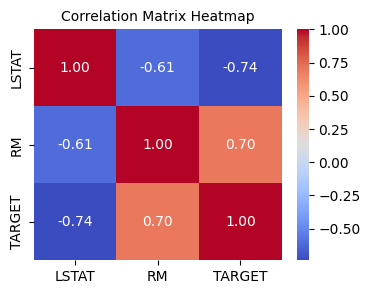

In [79]:
# Calculate the correlation matrix
correlation_matrix = np.corrcoef(df1.T)

# Get the feature names for labeling the heatmap
feature_names = df1.columns

# Create a heatmap using Seaborn
plt.figure(figsize=(4, 3))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f",
            xticklabels=feature_names, yticklabels=feature_names)
plt.title("Correlation Matrix Heatmap", fontsize=10)
plt.show()


In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the features for Ridge Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
simple_lr = LinearRegression()
ridge_lr = Ridge(alpha=1.0)  # You can adjust the alpha parameter

# Fit models
simple_lr.fit(X_train, y_train)
ridge_lr.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred_simple = simple_lr.predict(X_train)
y_test_pred_simple = simple_lr.predict(X_test)

y_train_pred_ridge = ridge_lr.predict(X_train_scaled)
y_test_pred_ridge = ridge_lr.predict(X_test_scaled)

# Calculate metrics
def calculate_metrics(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

train_metrics_simple = calculate_metrics(y_train, y_train_pred_simple)
test_metrics_simple = calculate_metrics(y_test, y_test_pred_simple)

train_metrics_ridge = calculate_metrics(y_train, y_train_pred_ridge)
test_metrics_ridge = calculate_metrics(y_test, y_test_pred_ridge)

# Calculate VAF
def calculate_vaf(y_true, y_pred):
    var_y_true = np.var(y_true)
    vaf = (1 - (np.var(y_true - y_pred) / var_y_true))*100
    return vaf

vaf_simple_train = calculate_vaf(y_train, y_train_pred_simple)
vaf_simple_test = calculate_vaf(y_test, y_test_pred_simple)

vaf_ridge_train = calculate_vaf(y_train, y_train_pred_ridge)
vaf_ridge_test = calculate_vaf(y_test, y_test_pred_ridge)

# Create a DataFrame for the results
results_data = {
    'Metric': ['MSE', 'MAE', 'R-squared', 'VAF'],
    'Simple LR (Train)': list(train_metrics_simple) + [vaf_simple_train],
    'Simple LR (Test)': list(test_metrics_simple) + [vaf_simple_test],
    'RR (Train)': list(train_metrics_ridge) + [vaf_ridge_train],
    'RR (Test)': list(test_metrics_ridge) + [vaf_ridge_test]
}

results_df = pd.DataFrame(results_data)

# Print the results
results_df

,Metric,Simple LR (Train),Simple LR (Test),RR (Train),RR (Test)
0,MSE,30.391855,31.243291,30.391991,31.226384
1,MAE,3.940490,3.898760,3.940850,3.898100
2,R-squared,0.650159,0.573958,0.650158,0.574188
3,VAF,65.015927,57.427774,65.015771,57.449951


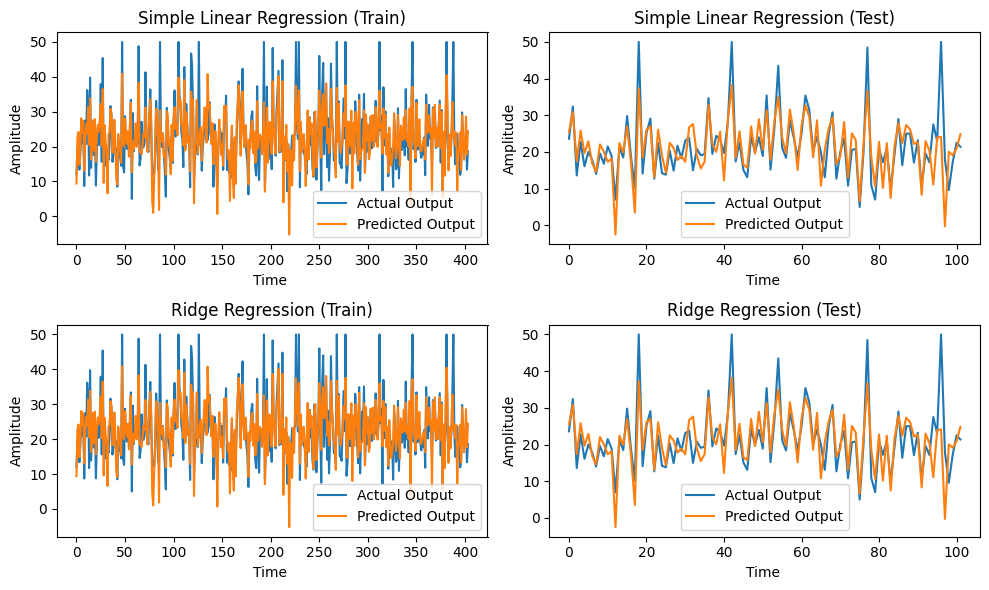

In [81]:
# Plot actual vs. estimated responses
def plot_predictions_subplot(y_true, y_pred, title, ax):
    x_values = np.arange(len(y_true))  # Create an array of length of y_true
    ax.plot(x_values, y_true, label='Actual Output')
    ax.plot(x_values, y_pred, label='Predicted Output')
    ax.set_xlabel("Time ")
    ax.set_ylabel("Amplitude")
    ax.set_title(title)
    ax.legend()

# Create subplots for training and testing cases
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

plot_predictions_subplot(y_train, y_train_pred_simple, "Simple Linear Regression (Train)", axes[0, 0])
plot_predictions_subplot(y_test, y_test_pred_simple, "Simple Linear Regression (Test)", axes[0, 1])
plot_predictions_subplot(y_train, y_train_pred_ridge, "Ridge Regression (Train)", axes[1, 0])
plot_predictions_subplot(y_test, y_test_pred_ridge, "Ridge Regression (Test)", axes[1, 1])

plt.tight_layout()
plt.show()
